In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
# path='/kaggle/input/sales-forecasting/train.csv'
path='train.csv'
df= pd.read_csv(path)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Ship Year"] = df["Ship Date"].dt.year
df["Ship Month"] = df["Ship Date"].dt.month

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Year       0
Order Month      0
Ship Year        0
Ship Month       0
dtype: int64

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Ship Year,Ship Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [ ]:
df['Sales'].describe()

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

In [ ]:
df.groupby(["Ship Mode"])[["Sales"]].sum().sort_values("Sales")

,Sales
Ship Mode,
Same Day,1.252190e+05
First Class,3.455723e+05
Second Class,4.491990e+05
Standard Class,1.332617e+06


<Axes: xlabel='Order Year'>

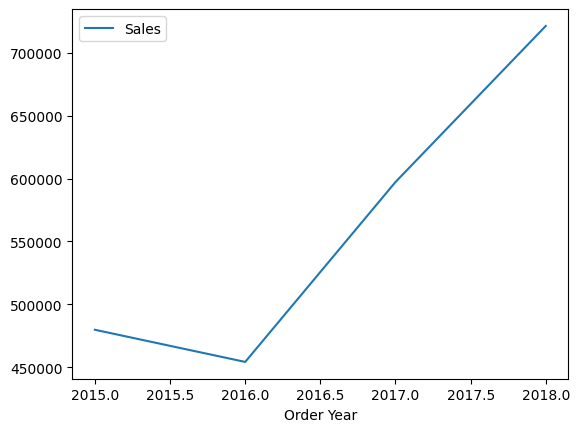

In [ ]:
df.groupby(["Order Year"])[["Sales"]].sum().sort_values("Order Year").plot()

<Axes: ylabel='count'>

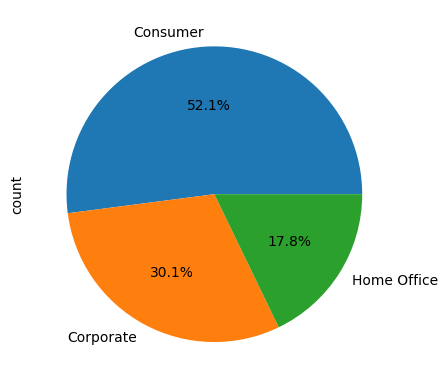

In [ ]:
df["Segment"].value_counts().plot(kind = "pie" , autopct = "%1.1f%%")

<Axes: ylabel='count'>

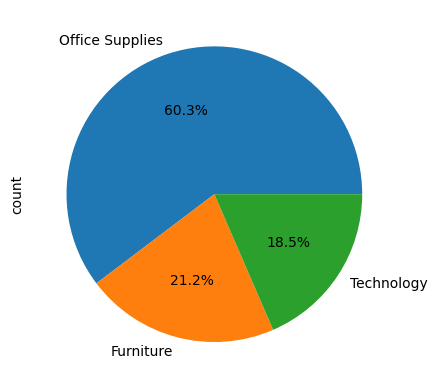

In [ ]:
df["Category"].value_counts().plot(kind = "pie" , autopct = "%1.1f%%")

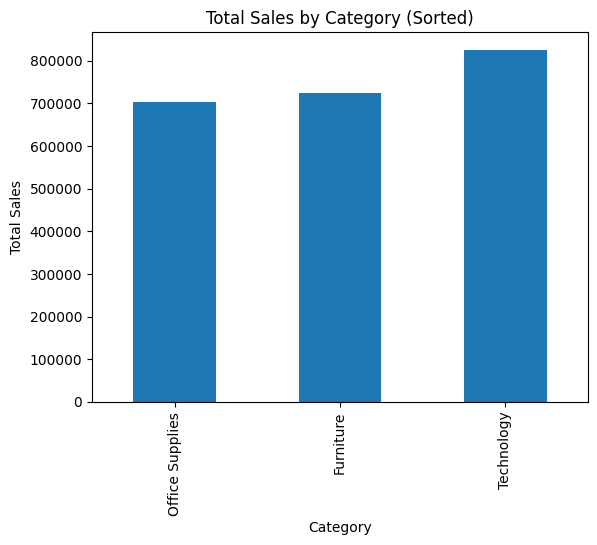

In [ ]:
sales_by_category = df.groupby(["Category"])[["Sales"]].sum().sort_values("Sales")
sales_by_category.plot(kind='bar', legend=False)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category (Sorted)')
plt.show()

Text(0.5, 1.0, 'top10 states')

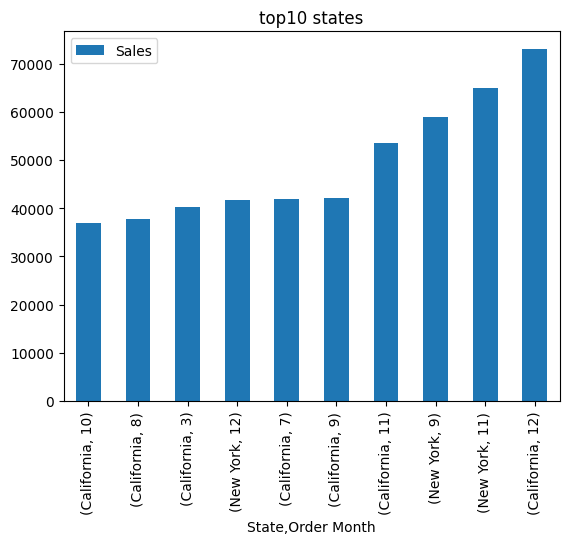

In [ ]:
top_10 = df.groupby(["State" , "Order Month"])[["Sales"]].sum().sort_values("Sales").tail(10)
top_10.plot(kind = "bar")
plt.title("top10 states")

<Axes: xlabel='Category', ylabel='Sales'>

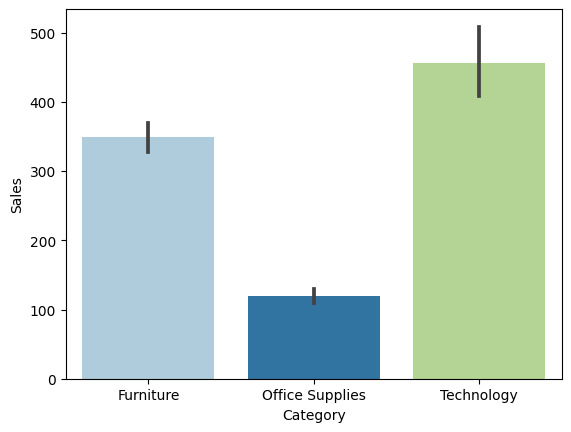

In [ ]:
sns.barplot(data=df , x= "Category", y= "Sales" , palette = "Paired")

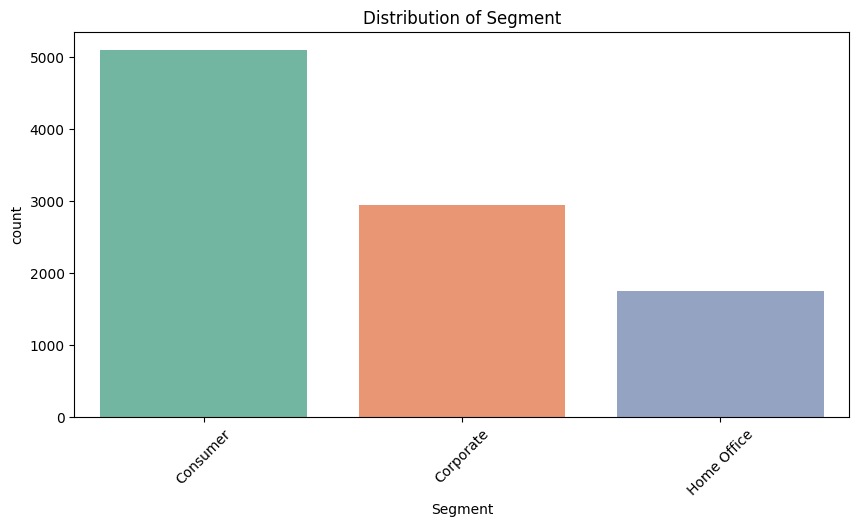

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Segment", palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Segment")
plt.show()

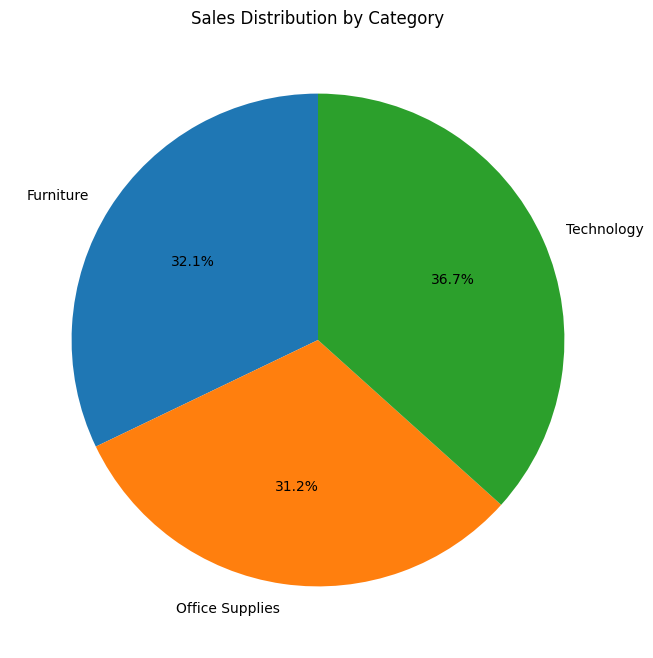

In [ ]:
sales_by_category = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Category")
plt.show()

<Axes: xlabel='Order Year', ylabel='Sales'>

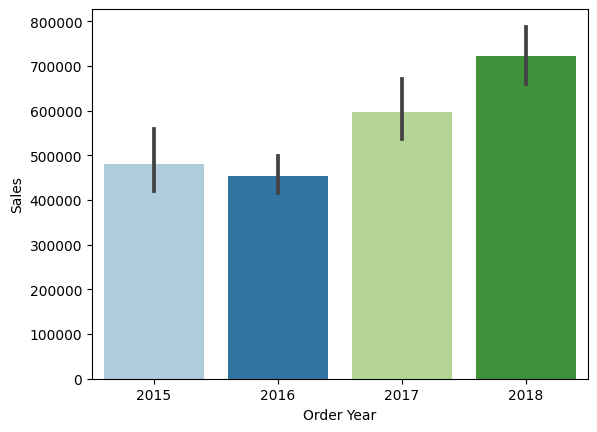

In [ ]:
sns.barplot(data=df, x='Order Year', y='Sales', estimator=sum, palette='Paired')# Rotate x-axis labels for better readabilityplt.xticks(rotation=45)# Adding labels and titleplt.xlabel('Order Year')plt.ylabel('Total Sales')plt.title('Total Sales by Order Year')# Display the plotplt.show()

<Axes: xlabel='Order Month', ylabel='Sales'>

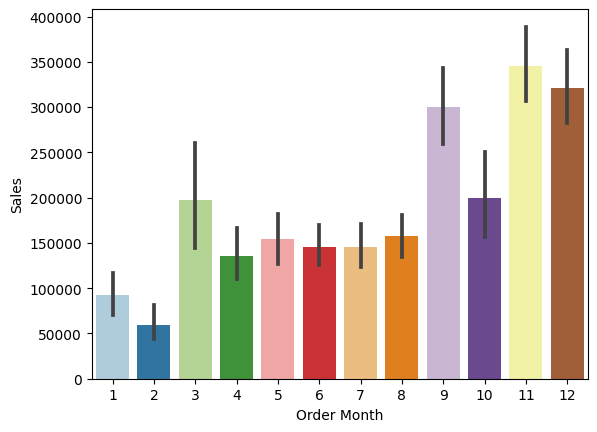

In [ ]:
sns.barplot(data=df, x='Order Month', y='Sales', estimator=sum, palette='Paired')# Rotate x-axis labels for better readabilityplt.xticks(rotation=45)# Adding labels and titleplt.xlabel('Order Month')plt.ylabel('Total Sales')plt.title('Total Sales by Order Year')# Display the plotplt.show()

In [ ]:
X = df[['Order Year','Order Month','Ship Year','Ship Month', 'Sales']]

In [ ]:
kmeans = []
for i in range(1,9):
  model = KMeans(n_clusters=i)
  model.fit(X)
  kmeans.append(model.inertia_)
kmeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[3827373104.981189,
 1974698688.4746828,
 998597636.6817884,
 602326482.3051591,
 406381931.09721375,
 258141171.59787166,
 183393983.0487182,
 136748820.3094251]

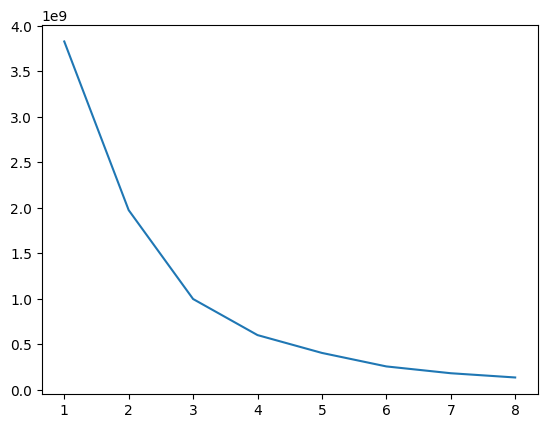

In [ ]:
n = list(range(1,9))
plt.plot(n,kmeans)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [ ]:
df['Cluster'] = kmeans.labels_  # Add cluster labels to the DataFrame

# Now, you can use df['Cluster'] for silhouette scoring
Cluster = df['Cluster']

In [ ]:
df['Cluster'] = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
 # Assuming df['Cluster'] contains the labels
silhouette_avg = silhouette_score(X, Cluster)
print(f'Silhouette Score: {silhouette_avg * 100:.2f}%')

Silhouette Score: 92.21%


In [ ]:
X_train = np.array([[2021, 1, 100], [2021, 2, 150], [2021, 3, 120]])  # Example features (year, month, sales)
y_train = np.array([20000, 270000, 410000])  # Example target sales (values to predict)

# Step 1: Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data

# Step 2: Train KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)  # Initialize KMeans with 2 clusters
kmeans.fit(X_train_scaled)  # Fit the KMeans model to the scaled data

# Step 3: Prepare the data with cluster labels
X_train_with_clusters = np.hstack((X_train_scaled, kmeans.labels_.reshape(-1, 1)))  # Add cluster label as a feature

# Step 4: Train the regressor model
regressor = LinearRegression()
regressor.fit(X_train_with_clusters, y_train)  # Fit the regression model with the new feature (cluster labels)

# Function to get user input and predict sales
def predict_sales(order_year, order_month, sales):
    # Step 1: Scale the input data using the same scaler
    input_data = np.array([[order_year, order_month, sales]])
    input_scaled = scaler.transform(input_data)  # Apply scaling to the input data

    # Step 2: Predict the cluster label for the new data
    cluster_label = kmeans.predict(input_scaled)[0]

    # Step 3: Prepare input for regression (add cluster label as a feature)
    regression_input = np.hstack((input_scaled, np.array([[cluster_label]])))  # Add cluster label to input

    # Step 4: Predict sales using the regressor model
    predicted_sales = regressor.predict(regression_input)[0]

    return predicted_sales

# Example: Get user input (you can replace this with `input()` calls for interactive use)
order_year = int(input("Enter Order Year: "))
order_month = int(input("Enter Order Month: "))
sales = float(input("Enter Sales Value (as an input feature): "))

# Predict and display result
predicted_value = predict_sales(order_year, order_month, sales)
print(f"Predicted Sales Value: {predicted_value:.2f}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Enter Order Year:  2023
Enter Order Month:  12
Enter Sales Value (as an input feature):  23043


Predicted Sales Value: 20418832.34
